#   Python ML Classification Cheat Sheet

# General Data Science Cycle:

Data Understanding
    0. Exploratory Data Analysis

Data Preparation
    1. Target Definition
    2. Feature Engineering
    3. Data Splitting

Modeling
    4. Variable Selection
    5. Model Selection
    6. Fine-tuning

Evaluation
    7. Evaluation & Interpretation

# Table of content (ML Classification on Telecom Churn Prediciton Dataset):

Libraries
    1. Basic Libraries to import 
    2. Import the libraries you need
 
Styling 
    1. Styling for graphs 
     
Data Import
    1. Importing default dataset (if taken from library)
    2. Turning to pandas dataframe (if not structured as dataframe)
    
EDA (Exploratory Data Analysis)
    1. Tabular Visualization 
        a. Top 5 Rows
        b. Bottom 5 rows 
        c. Looking at dataset metrics such as row count, mean, Median(50%), etc
    2. Graphical Visualization 
        a. Heat Map (Correlation Matrix)
        b. Find dist, mean, median
        c. Scatter Plot
        d. Pair Plot
    
Data Preparation
    1. Target Definition 
    2. Feature Engineering
        a. Feature Selection
        b. Nomalization
        c. One-hot encoding (for categrical/Nominal variables)
        d. Data Cleaning
    3. Data Splitting

Modeling
    1. Variable Selection
        a. variable selection methods
        b. selected variables -  overwrite
    2. Model Selection
    3. Fine-tuning

Evaluation
    7. Evaluation & Interpretation

#  Set Up Libraries

In [6]:
# Data Manipulation & analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

# Modeling
!pip install boruta
from boruta import BorutaPy 

from sklearn.feature_selection import RFE, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import xgboost as xgb

# Evaluation
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# Other Set Up
from datetime import datetime
import os
import warnings
from pprint import pprint

# Styling 

In [2]:
# Set style for displaying data
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Set style for plotting
sns.set_style("whitegrid")

# Import Data 

In [15]:
### get the directory of this notebook
os.path.abspath(os.getcwd())

'C:\\Users\\hinda\\Documents'

In [16]:
# Read data
data = pd.read_csv('Telecom_customer churn.csv')

# Count rows & columns
print(data.shape)

(100000, 100)


# EDA (Exploratory Data Analysis)

In [19]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [ ]:
data_desc = data.describe()
data_desc.style.background_gradient()

## Sampling Data Set (Decrease Population Size) [Optional]

In [ ]:
rows = data.sample(frac =.25)

In [ ]:
rows.head()

## 1. Plot Catagorical 

### a. Heat Map ( correlation matrix)

In [ ]:
# Compute correlation matrix
corr = boston_df.corr().round(2)

# Set figure options
fig,  ax = plt.subplots(figsize=(11,11),nrows=1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate heatmap including mask, and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True,annot=True, cbar_kws={"shrink": .8})

# Fix axis
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### a. Find distrebution, mean, median


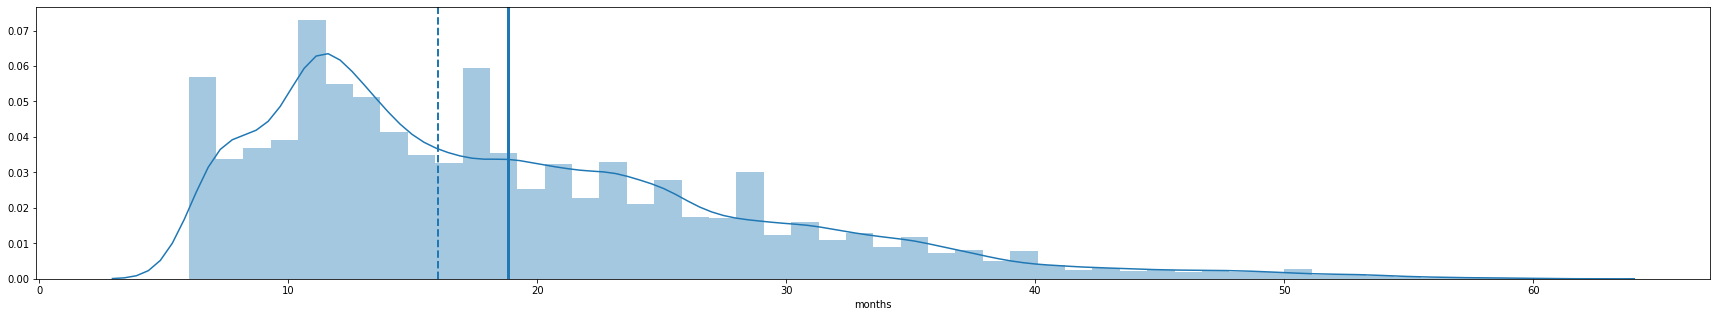

In [24]:
fig,  ax = plt.subplots(ncols=1,figsize=(30,5),nrows=1)

sns.distplot(data[x])
ax.axvline(data[x].mean(), linestyle='solid', linewidth=3)
ax.axvline(data[x].median(),  linestyle='dashed', linewidth=2)

### b. Jointplot

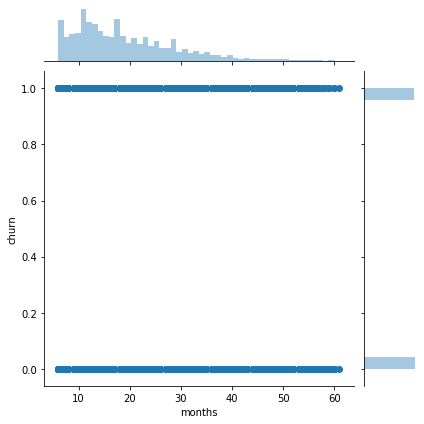

In [25]:
sns.jointplot(data[x],data[y])

### c. Scattter plot

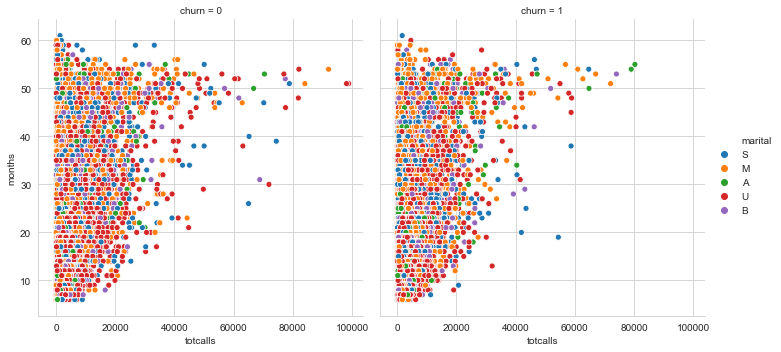

In [23]:
ax=sns.relplot(x="totcalls", y="months",hue="marital",col="churn",kind="scatter", data=data)

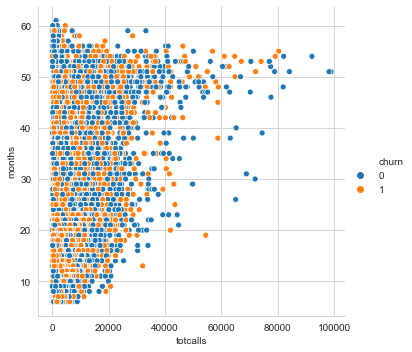

In [20]:
ax=sns.relplot(x="totcalls", y="months",hue="churn",kind="scatter", data=data)

### d. Regression Plot for correlation (positive, negative, none)

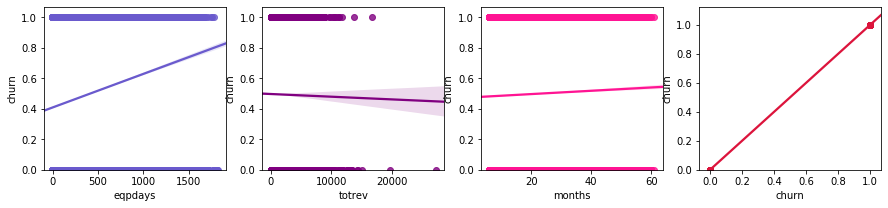

In [27]:
## Create plots for bivariate analayis with select X and Y

# Create empty subplots
fig, ax = plt.subplots(ncols=4,figsize=(15,3))

# Select features to check and loop through
for i, var in enumerate(multiple_x):
    sns.regplot(data[var], data[y], color=clr[i], ax=ax[i])
    ax[i].set(ylim=(0, None))

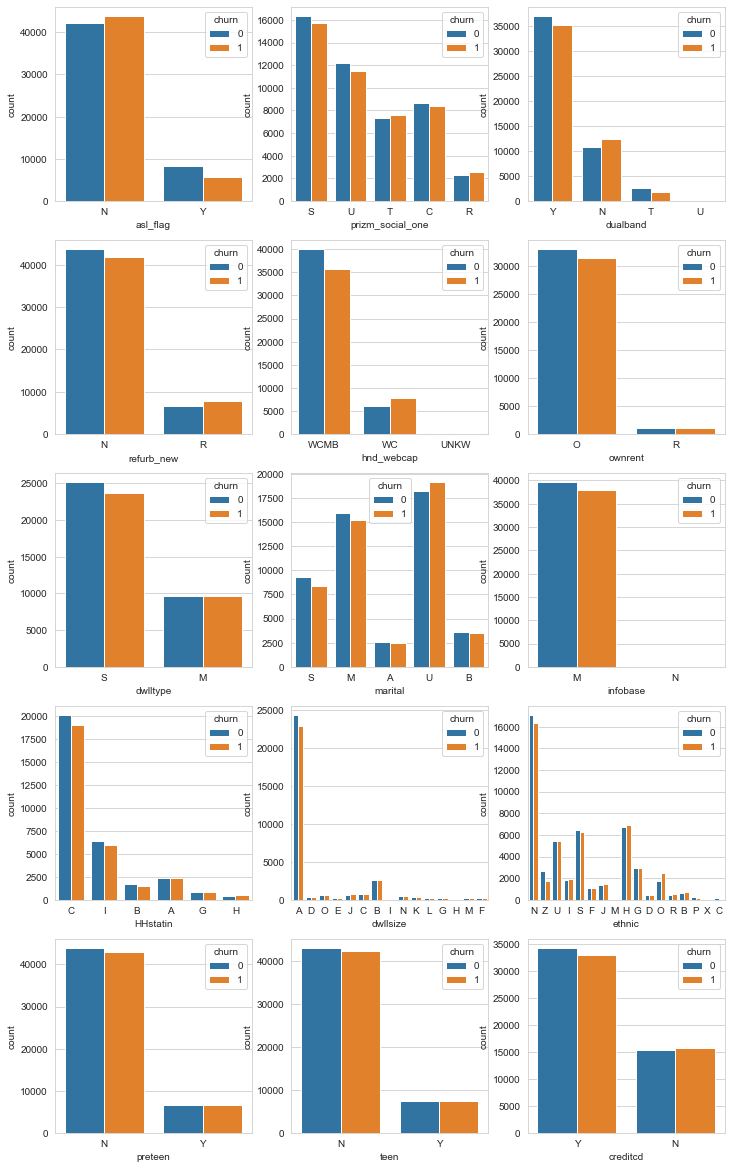

In [19]:
#matplot lib
categ_nominal_noArea = data[categ_nominal].drop("area",axis=1)

plt.figure(figsize=(12,25))
for k in range(1,len(categ_nominal_noArea.columns)):
    plt.subplot(6,3,k)
    sns.countplot(x=categ_nominal_noArea.columns[k], data=data,hue='churn')

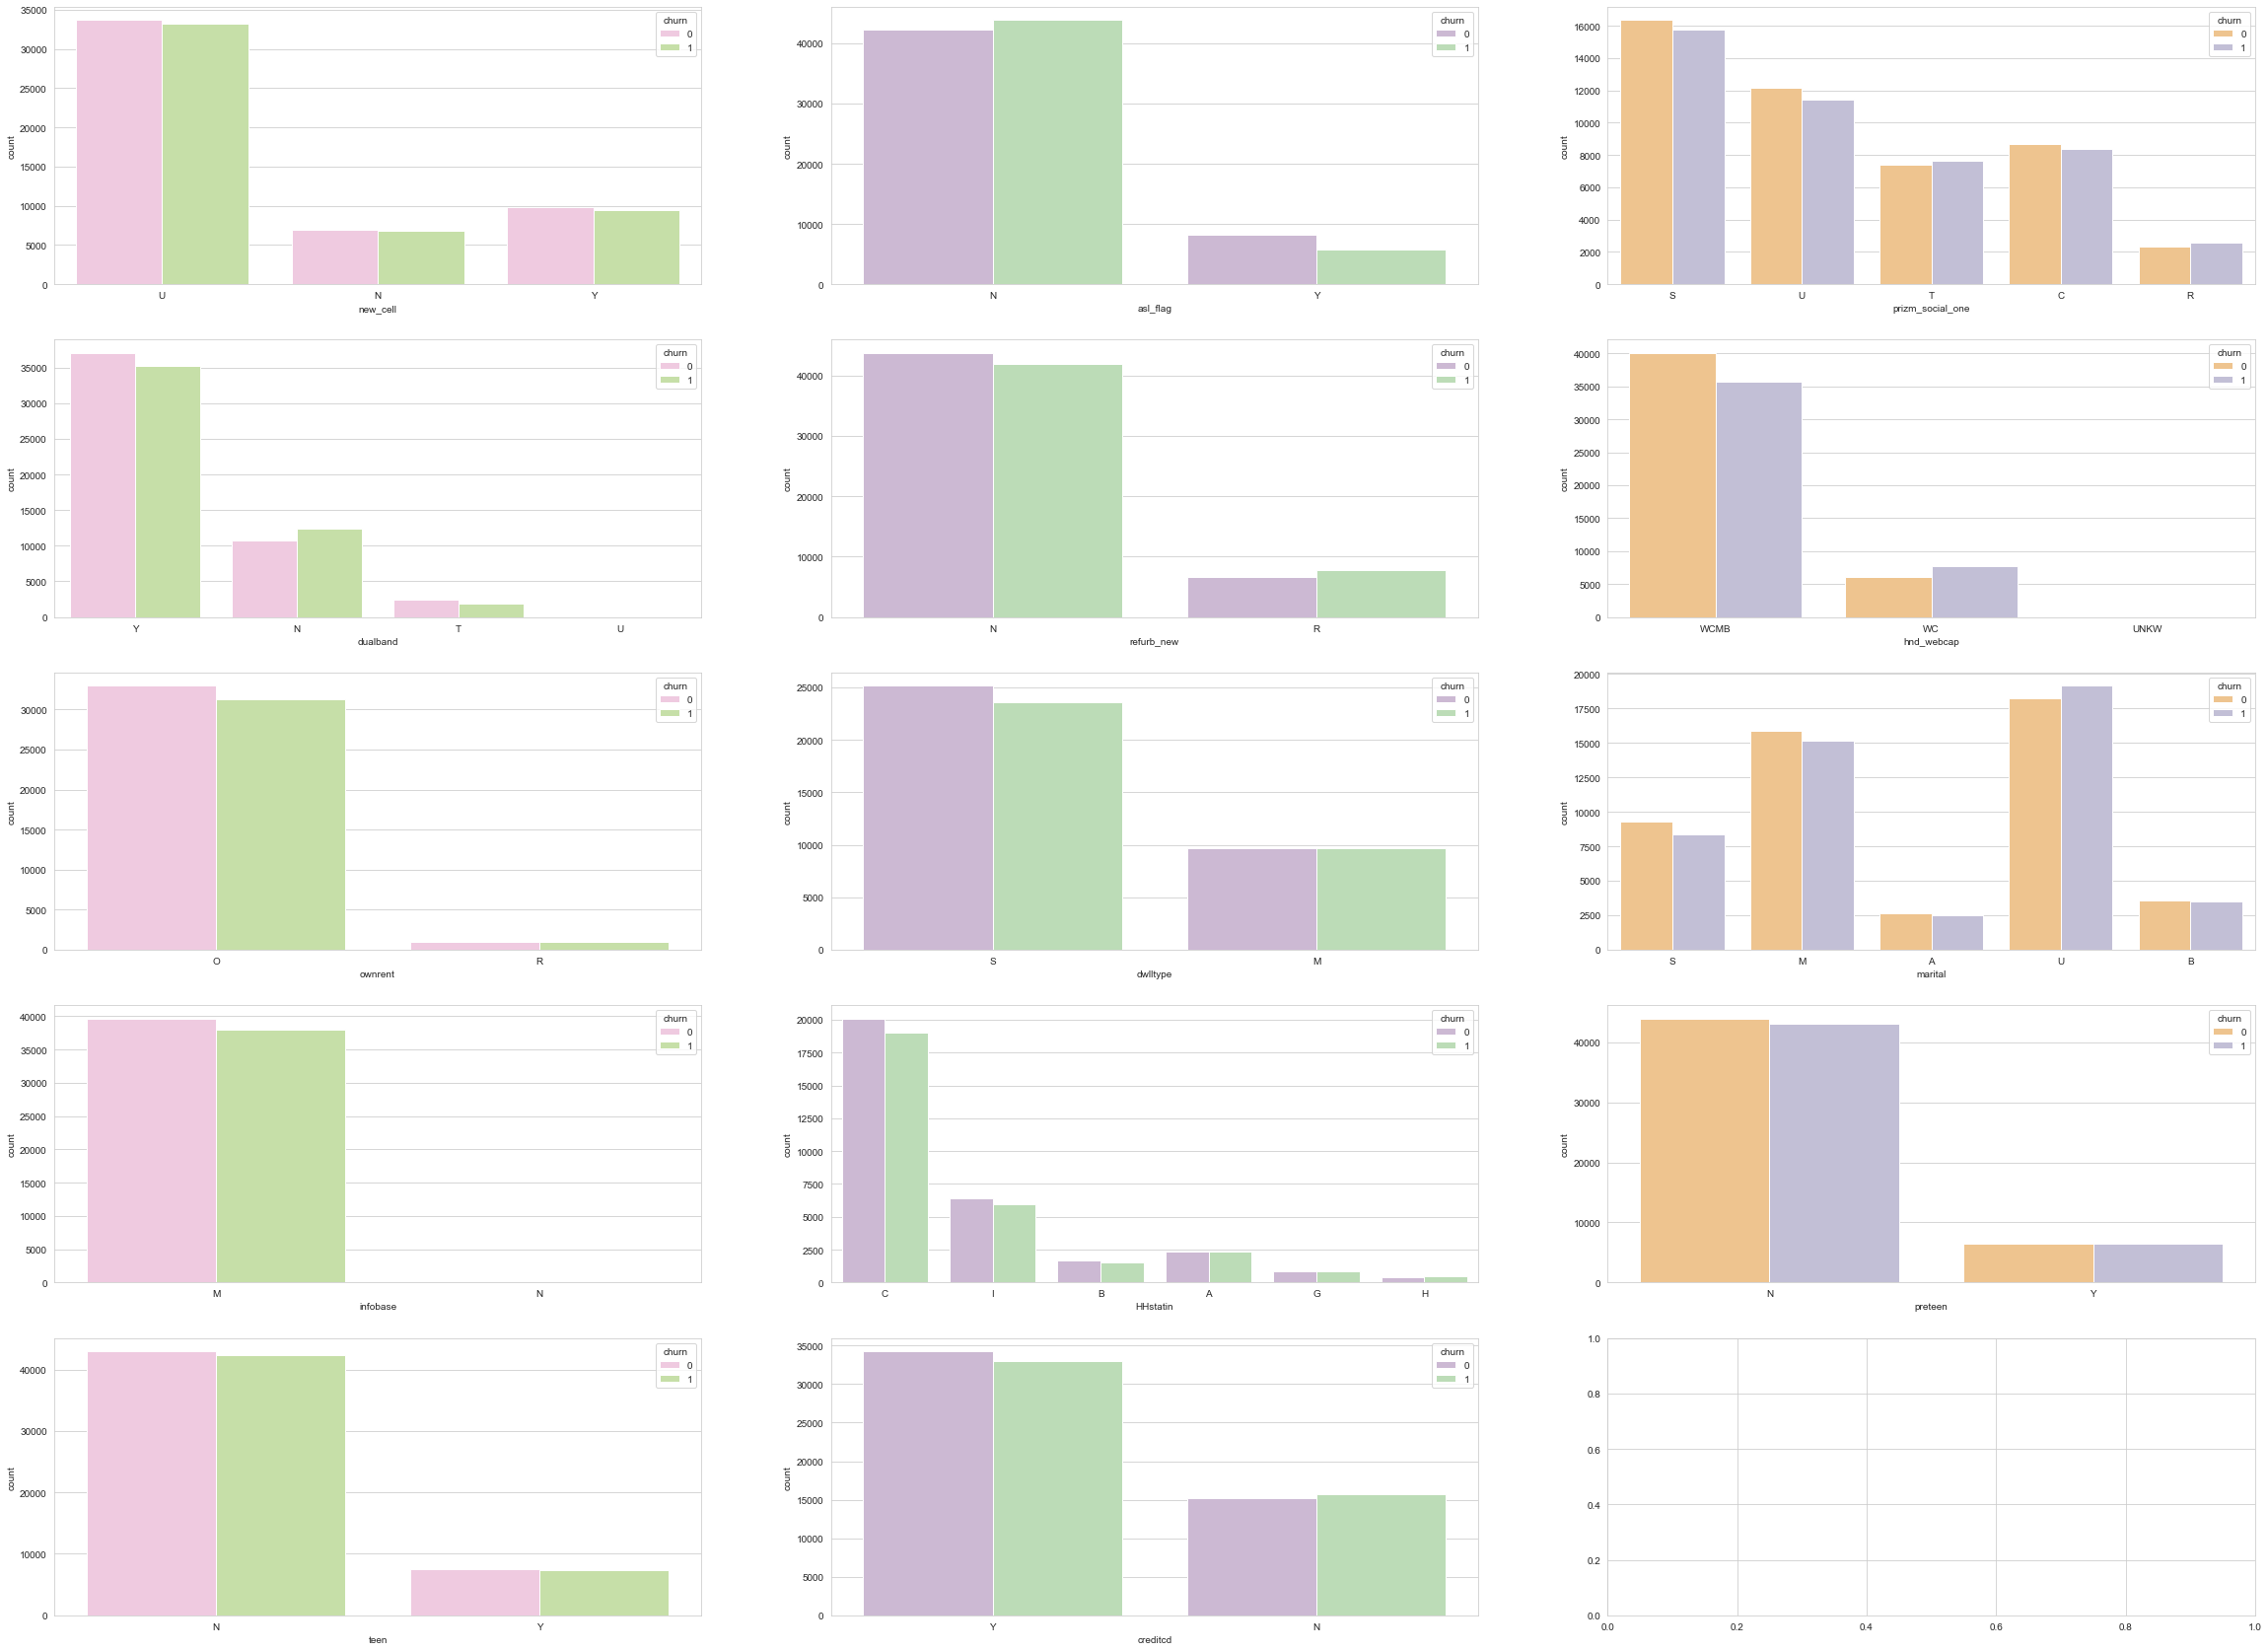

In [18]:
#seaborn
columns = [x for x in categ_nominal if x not in ["area","dwllsize","ethnic"]] #you by no means have to do this you can use .remove or .pop 
# Set pallets
clr = ['PiYG', 'PRGn', 'PuOr'] 
# Create empty subplots
fig,  ax = plt.subplots(ncols=3,figsize=(40,30),nrows=5) 
ax = ax.flatten() # ax is a two dimentional matrix flatten to iterate through x only instead of x & y dimensions 
# Select features to check and loop through
cnt=0
for i, var in enumerate(columns):
    sns.countplot(x=var, hue="churn", data=data,ax=ax[i],palette=clr[cnt]) # draws histogram
    cnt+=1
    if cnt%3==0:
        cnt=0   

### e. Pair Plot with hue for Target

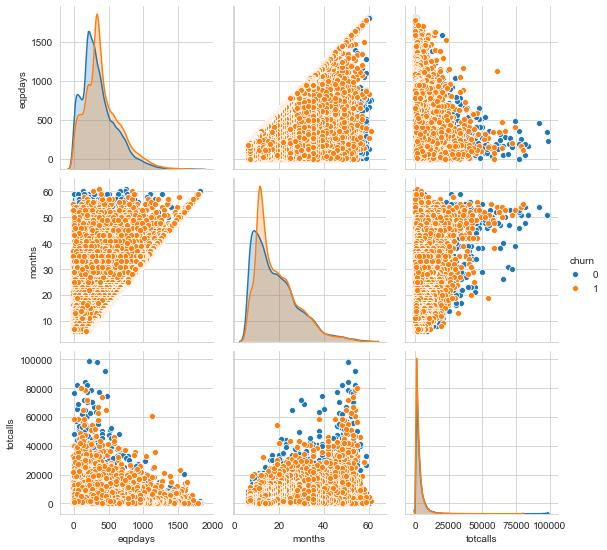

In [24]:
# Generate pairplots for selected features.
features = ['eqpdays','months', 'totcalls','churn']
sns.pairplot(data[features], hue ='churn')

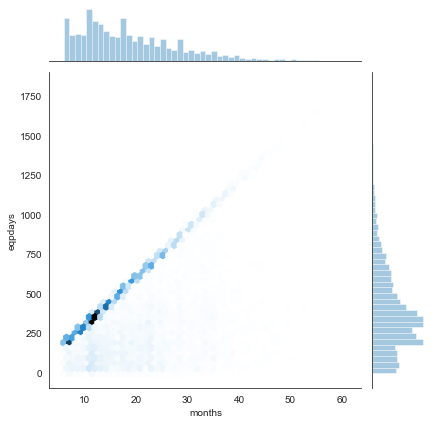

In [13]:
with sns.axes_style("white"):
    sns.jointplot(x=data["months"], y=data["eqpdays"], kind="hex") # histogram + shows the distribution of the population

In [36]:
data=data.sample(frac=0.01)

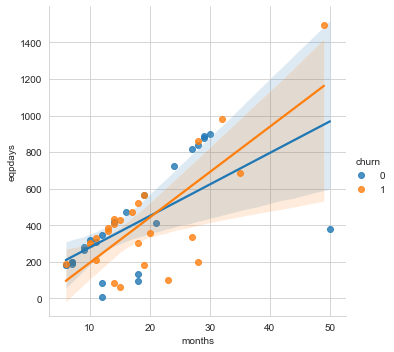

In [38]:
sns.lmplot(x="months", y="eqpdays", hue="churn", data=data) # linear regression graph of x and y
#shows relation between x and y with categorical variable in hue

https://seaborn.pydata.org/api.html --> link to seaborn documentation

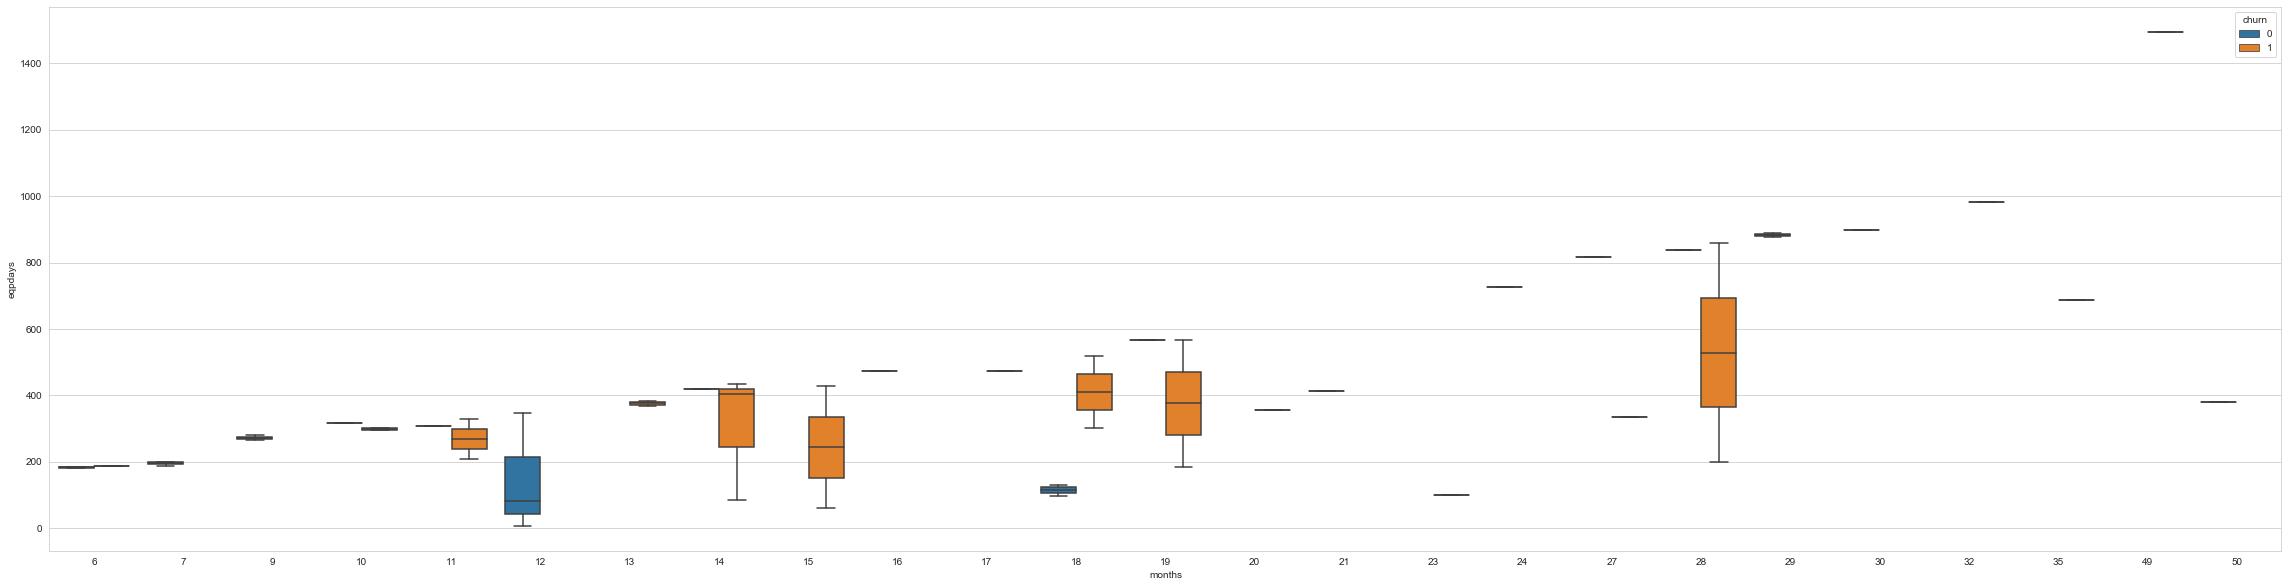

In [39]:
plt.figure(figsize=(40,10))
ax = sns.boxplot(x="months", y="eqpdays",hue="churn", data=data) 

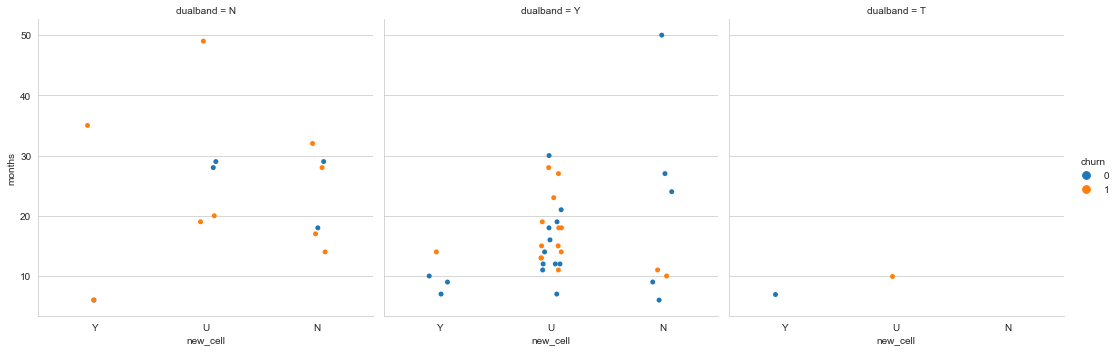

In [40]:
g = sns.catplot(x="new_cell", y="months", hue="churn", col="dualband", data=data,height=5) # categorical x vs numerical y

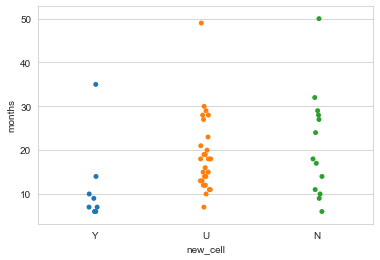

In [37]:
ax = sns.stripplot(x="new_cell", y="months", data=data, jitter=0.05) # categorical x vs numerical y

## 2- Numeric Values

### The number of numeric variables is very big, but we can try to start with variables that we think might be useful using domain knowledge

    Here is a place wehere can get the help of a domain expert

# Data Prepertation 

## 1- Target Definition

### Setting feature we want to visualize as x and our target 'churn' as y
    We can change these as many times with multiple variables

In [23]:
x = 'months'
multiple_x = ['eqpdays',
              'totrev',
              'months',
              'churn']
y = 'churn'

## 2- Feature Engineering

### a- Sampling Data Set (Decrease Size) [Optional]

In [ ]:
data = data.sample(frac =.2)

In [ ]:
data_desc = data.describe()
data_desc.style.background_gradient()

    Here we can check our data to make sure that the sampling didn't change the nature of the dataset too much


 Note: We still have the "data_original" dataframe in case we need to revert any changes


### b- Creating New Variables

    This where we can get help from domain experts to see what kind of new variables we can create with the data we have


***Tweak/create new variables***

In [ ]:
# Hide warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace kid0-10 columns with preteen 
preteen = data[["kid0_2",
                "kid3_5",
                "kid6_10"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y" or x.iloc[2] == "Y") else "N",axis=1)
data["preteen"] = preteen
data.drop(["kid0_2","kid3_5","kid6_10"], axis=1, inplace=True)

# Replace kid11-17 columns with teen 
teen = data[["kid11_15","kid16_17"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y") else "N",axis=1)
data["teen"] = teen
data.drop(["kid11_15","kid16_17"], axis=1, inplace=True)

    The above was created based on our understinding of the data and realizing that the "kid*" columns can be combined

In [ ]:
#Create new variables
data["CDR_data"] = data["drop_dat_Mean"]/data["plcd_dat_Mean"]
data["CSSR_data"] = data["comp_dat_Mean"]/data["plcd_dat_Mean"]
data["CSSR_voice"] = data["comp_vce_Mean"]/data["plcd_vce_Mean"]
data["CSSR"] = data["complete_Mean"]/data["attempt_Mean"]

In [ ]:
data['CSSR'].hist(by=data.churn) #validating our new variables

    We can run the above exploratory data analysis again on the newly created variables

   #### Note: The above can be requested to the data engineering team to preform on the original dataset!

### ** Doing Further exploration on new dataset ***
- Handling categorical variables

In [ ]:
# Let's check all non-numeric fields.
data.columns[data.dtypes.values == "object"]

In [ ]:
# Save all nominal categorical variables
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic','preteen','teen','creditcd']

# Save all ordinal ordered categorical variables
categ_ordinal_ordered = ['crclscod'] #Credit class code

In [ ]:
# Check nominal categorical summaries
data[categ_nominal].describe()

In [ ]:
# Check nominal categorical summaries
data[categ_ordinal_ordered].describe()

### c- One-hot encoding of Catagorical(nominal) values

In [ ]:
# Let's one-hot encode all (takes about 1 minute)
for i in categ_nominal:
    data = pd.concat([data,
                      pd.get_dummies(data[i],
                                     prefix=i,
                                     dummy_na=True)],
                     sort=False,
                     axis=1)
    
print(data.shape) 

In [ ]:
# Remove the categorical variables
data = data.drop(categ_nominal,
                  axis=1)
print(data.shape)

In [ ]:
# Order ordinal catagorical values as alphabet sort and then assign numbers instead
for i in categ_ordinal_ordered:
    s_a = sorted(data[i].unique())
    s_a_dict = {i:x for x,i in enumerate(s_a)}
    data[i] = data[i].map(s_a_dict)

    We created a lot of dummy variables in the above, let's see what we will do with them later


### d- Data Cleaning

In [ ]:
# Now we have all numerical values, let's check for missing values and rare dummy variables
# We can check missing values under "count" in the descritpive statistics overview
# We will take this in excel 
data.describe()

***Handle Missing Values***

In [ ]:
# Remove all variables based on above analyis (see excel): that have either too many missing values, or are too rare, or is not relevant (e.g. customer id)
toremove = ['new_cell_nan','asl_flag_nan','preteen_nan','teen_nan','Customer_ID','dualband_nan','refurb_new_nan','area_nan','ethnic_X','ethnic_M','dualband_U','infobase_N','hnd_webcap_UNKW','ethnic_C','dwllsize_I','dwllsize_H','dwllsize_G','dwllsize_M','dwllsize_F','ethnic_P','dwllsize_L','dwllsize_E','dwllsize_K','dwllsize_D','ethnic_D','HHstatin_H','dwllsize_N','ethnic_R','dwllsize_O','ethnic_B','dwllsize_J','dwllsize_C','marital_nan','ethnic_nan','creditcd_nan','HHstatin_G','ownrent_R','ethnic_F','area_PHILADELPHIA AREA','area_TENNESSEE AREA','ethnic_J','HHstatin_B','area_SOUTH FLORIDA AREA','ethnic_I','ethnic_O','area_CENTRAL/SOUTH TEXAS AREA','dualband_T','area_NORTHWEST/ROCKY MOUNTAIN AREA','area_HOUSTON AREA','area_NORTH FLORIDA AREA','ethnic_Z','area_OHIO AREA','area_GREAT LAKES AREA','HHstatin_A','prizm_social_one_R','CDR_data','CSSR_data','numbcars','lor','income','adults']

# Remove
data = data.drop(toremove,axis=1)
print(data.shape)

In [ ]:
# Remove variables with over 20% missing 
data = data.drop(['ownrent','hnd_webcap','dwllsize','prizm_social_one'],axis=1)
print(data.shape)

In [ ]:
# Replace all other missing values with the median 
data = data.fillna(value=data.median())

### e- Selected Features from feature engineering

In [ ]:
selected_features = ['eqpdays','totrev','months']

### f- normalization

In [ ]:
# Scale from 0 to 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

## 3- Split Data (Train/Test Split)


### Here we will split the data to four parts
    X_train: training columns
    Y_train: target column
    X_test: ...
    y_test: ...

In [ ]:
# Split data 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#### Creating dataframe with column names

In [ ]:
# This step is needed so that var selection methods can bring us column names - otherwise, 
# X_Train and Y_train are just numpy arrays, which is efficient for algorithm fitting but not for var selection 
#x_train_df=pd.DataFrame(x_train)
#x_train_df.columns = 
#x_test_df=pd.DataFrame(x_test)
#x_test_df.columns = 

### Note: after this step -> go to normalization in feature engineering

# Modeling

### Model Selection

        -Logistic Regression
        -Random Forest
        -XGBoost

- Since this is a Classification problem, It's a good idea to start with Logistic Regression

### Here we will fit our features into a Logistic Regression model


- No need to import again if you already imported it above
- from sklearn.linear_model import LogisticRegression

### Raveling y_train (Please explain!!!!)


In [ ]:
# Set model: Simple Logistic Regression
LogisticRegression_model = LogisticRegression().fit(x_train,y_train.values.ravel()) #We will fit the training data in the model

#### Visualizing coefficients to understand which columns affect our model the most

# Visualize Coefficients
sns.set_style("whitegrid")
plt.bar(np.arange(LogisticRegression_model.coef_.shape[0]), LogisticRegression_model.coef_)
plt.xticks(np.arange(LogisticRegression_model.coef_.shape[0]), X_train_df.columns, rotation='vertical')
plt.xlim([-1, LogisticRegression_model.coef_.shape[0]])
plt.title("Logistic Regression model coefficients")
plt.show()

## 1- Using the model

***a. Logistic Regression***

In [ ]:
#Here we will use ower model by applying it on our test data to predict the price for each house in the test data
preds_test = LogisticRegression_model.predict(x_test)

In [ ]:
#The values are saved in this array
preds_test

In [ ]:
#We will do the same on the training data
preds_train = LogisticRegression_model.predict(x_train)

In [ ]:
preds_train

***b. Random Forest***

In [ ]:
# Random Forest Classifier
RF_model = RandomForestClassifier(n_estimators = 1000)

# Score
start_time = timer() #start
RF_scores= cross_validate(RF_model, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)
timer(start_time) #end

# Store Results
RF_AUC = (RF_scores['test_roc_auc']).mean().round(3)
RF_Acc = (RF_scores['test_accuracy']).mean().round(3)
RF_Prec = (RF_scores['test_precision']).mean().round(3)
RF_Rec = (RF_scores['test_recall']).mean().round(3)

# Takes 22 minutes

***c. XG Boost***

In [ ]:
# XG Regressor
XGB_model = xgb.XGBClassifier()

# Score
start_time = timer() #start
XGB_scores = cross_validate(XGB_model, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)
timer(start_time) #end

# Store Results
XGB_AUC = (XGB_scores['test_roc_auc']).mean().round(3)
XGB_Acc = (XGB_scores['test_accuracy']).mean().round(3)
XGB_Prec = (XGB_scores['test_precision']).mean().round(3)
XGB_Rec = (XGB_scores['test_recall']).mean().round(3)

# takes 30 seconds

***Compare Models & Select best model(s) so far***

In [ ]:
# Check model outputs so far
models = [('Logistic Regression (train)', LogR_AUC, LogR_Acc, LogR_Prec, LogR_Rec),   
          ('Random Forest Classifier (train)', RF_AUC, RF_Acc, RF_Prec, RF_Rec),   
          ('XG Boost Classifier (train)', XGB_AUC, XGB_Acc, XGB_Prec, XGB_Rec)
        ]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

# Evaluation

## ***Evaluation Metrics***

We will use the following evaluation metrics for classification:
        - AUC
        - Accuracy
        - Precision
        - Recall

In [ ]:
# Define Scoring metrics
scoring = ['roc_auc', 'accuracy','precision', 'recall']

In [ ]:
# Logistic Regression
LogisticRegression_model = LogisticRegression()

# Score
LogR_scores = cross_validate(LogisticRegression_model, x_train, y_train.values.ravel(), cv=5, scoring=scoring)

# Store Results
LogR_AUC = (LogR_scores['test_roc_auc']).mean().round(3)
LogR_Acc = (LogR_scores['test_accuracy']).mean().round(3)
LogR_Prec = (LogR_scores['test_precision']).mean().round(3)
LogR_Rec = (LogR_scores['test_recall']).mean().round(3)

In [ ]:
print("Area Under Curve (AUC): " + str(LogR_AUC))

Add other evalution metrics above!!!

In [29]:
## Confusion Matrix

    The confusion matrix can helps identify... (Please Expand!!!)

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = preds_test #Create y_pred using predicted results on test data

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

### Let's visualize it

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## AUC Graph

## Relative Feature Importance

## Now we can see how our model works

### Let's try it on our training data

In [ ]:
plt.scatter(y_train, preds_train, label="Train")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()

#### The model looks good(but can be better!) because the there isn't a big difference between the real price and predicted price for most data points
    For high prices (50) it seems that the predicted price is lower than the real price so that is one area we can improve our model

### Now let's try it on our test data 

In [ ]:
plt.scatter(y_test, preds_test, label="Train")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()

#### The model looks good(but can be better!) for our test data too which means that it is not overfitted on the training data

### Now lets viusalize it on our traing and test data

In [ ]:
# It also interesting to take a look how the predicted points relate to real ones.
# All the points should lie on the black dotted line assuming that our model is perfect
plt.scatter(y_train, preds_train, label="Train")
plt.scatter(y_test, preds_test, c="r", label="Test")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()

### But how do we evaluate it using concrete numbers?
    We will use the Mean Absolute Error(MAE), Mean Square Error(MSE) and R2 score on our test dataset

In [ ]:
LR_score_MAE = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='neg_mean_absolute_error').mean().round(2)
LR_score_MSE = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='neg_mean_squared_error').mean().round(2)
LR_score_R2 = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='r2').mean().round(2)

print('MAE (CV):',LR_score_MAE)
print('MSE (CV):',LR_score_MSE)
print('R2 (CV):',LR_score_R2)

#### Basically, the MAE is the average distance between our predicted price and the real price
    The bigger the distance is, the bigger our error is

### If you think this model is good enough, you can save it

In [ ]:
import pickle

In [ ]:
filename = 'MyLinearRegressionModel.sav'
pickle.dump(LinearRegression_model, open(filename, 'wb'))

### And load it

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))